# Explore GeMAPS
Use this code to find out how the features of the GeMAPS feature set are extracted

Most of the logic for this Notebook is hidden in the class "Custom_GeMAPS"

In [13]:
# Imports
# Python packages
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Custom package
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent / "src"))
from age_by_voice.audio.custom_gemaps import Custom_GeMAPS, GeMAPS_Settings

# Load an audiofile
Load an audiofile into the Custom_GeMAPS class.
Its best to use a Wave file.
You can customize the samplerate.

When the file is found the class has the sample_rate (sr) and the array of samples (y).

In [14]:
audio_path: str = "../data/awed5130.wav"

# play the audio
ipd.Audio(filename=audio_path, autoplay=True)

In [15]:
custom_ge = Custom_GeMAPS(audio_path=audio_path, sample_rate=16000)

custom_ge.sr

16000

Text(0, 0.5, 'Amplitude')

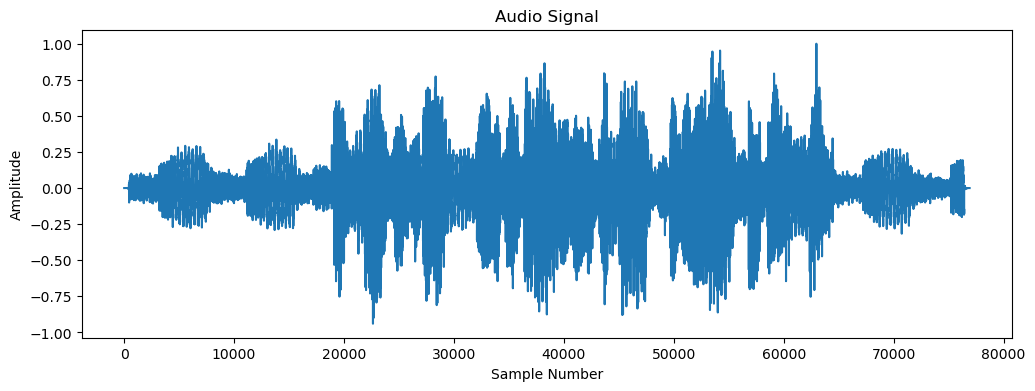

In [16]:
# Plot the samples
plt.figure(figsize=(12, 4))
plt.plot(custom_ge.y)

plt.title("Audio Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

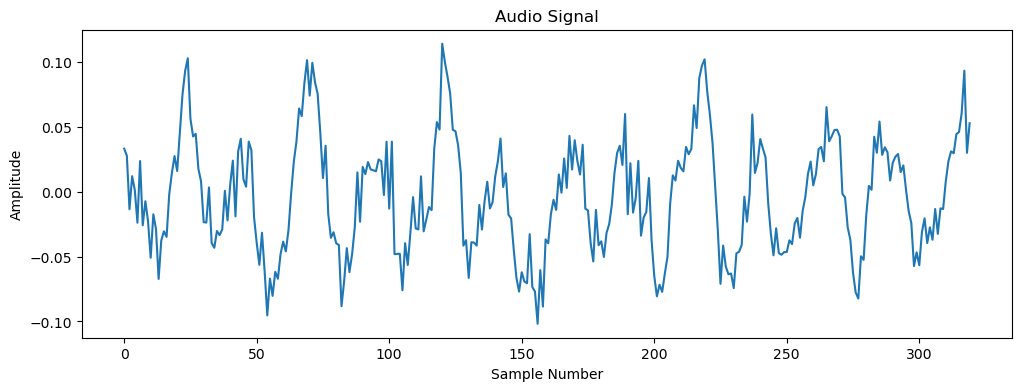

In [17]:
# Plot a short timeframe of the audio signal 
plt.figure(figsize=(12, 4))
length = 0.02 # lenghth of the timeframe in seconds
offset = 0.5 # offset in seconds
time_start = int(custom_ge.sr * offset)
time_end = time_start + int(custom_ge.sr * length)
plt.plot(custom_ge.y[time_start:time_end])

plt.title("Audio Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")

# Time Domain Features
We can also extract time domain features from the audio signal.

In [18]:
# Loudness
loudness = custom_ge.loudness()

print(f"Mean Loudness: {loudness.loudness_mean}, Standard Deviation Loudness: {loudness.loudness_std}")
print(f"25: {loudness.loudness_25}, 80: {loudness.loudness_80}, 90: {loudness.loudness_90}")

Mean Loudness: -8.223228101009969, Standard Deviation Loudness: 6.022231860148772
25: -11.665948867797852, 80: -3.0288921991984044, 90: -1.531835873921712


In [19]:
# Zero Crossing Rate
zcr = custom_ge.zero_crossing_rate()

print(f"Mean ZCR: {zcr.zcr_mean}, Standard Deviation ZCR: {zcr.zcr_std}")

Mean ZCR: 0.12509095634095632, Standard Deviation ZCR: 0.11701079784237131


In [20]:
# Peaks per Second
pps = custom_ge.peaks_per_second()

print(f"Mean Pps: {pps.pps_mean}, Standard Deviation Pps: {pps.pps_std}")
print(f"25: {pps.pps_25}, 80: {pps.pps_80}, 90: {pps.pps_90}")

Mean Pps: 58.333333333333336, Standard Deviation Pps: 35.93976442141304
25: 29.166666666666668, 80: 95.55555555555554, 90: 99.99999999999999


# Into the Frequency domain!
Visualize the audio file in the frequency domain using the spectrogram function of the Custom_GeMAPS class.

In [21]:
# F0
f0 = custom_ge.f0()

print(f"Mean F0: {f0.f0_mean}, Standard Deviation F0: {f0.f0_std}")
print(f"Min F0: {f0.f0_min}, Max F0: {f0.f0_max}")
print(f"25: {f0.f0_25}, 80: {f0.f0_80}, 90: {f0.f0_90}")

Mean F0: 160.8479336435966, Standard Deviation F0: 114.71313890625133
Min F0: 41.39986530607922, Max F0: 422.13310636359427
25: 49.23356193343797, 80: 275.05606171210303, 90: 311.1170435483082


In [22]:
# HNR
hnr = custom_ge.harmonics_to_noice_ratio()

print(f"Mean HNR: {hnr.hnr_mean}, Standard Deviation HNR: {hnr.hnr_std}")

Mean HNR: 10.28323237101237, Standard Deviation HNR: 0.0


In [23]:
# Additional features
additional_features = custom_ge.additional_spectral_features()

print(f"Mean Spectral Centroid: {additional_features.spectral_centroid_mean}, Standard Deviation Spectral Centroid: {additional_features.spectral_centroid_std}")
print(f"Mean Spectral Bandwidth: {additional_features.spectral_bandwidth_mean}, Standard Deviation Spectral Bandwidth: {additional_features.spectral_bandwidth_std}")
print(f"Mean Spectral Flatness: {additional_features.spectral_flatness_mean}, Standard Deviation Spectral Flatness: {additional_features.spectral_flatness_std}")
print(f"Mean Spectral Rolloff: {additional_features.spectral_rolloff_mean}, Standard Deviation Spectral Rolloff: {additional_features.spectral_rolloff_std}")

Mean Spectral Centroid: 1626.4136003976892, Standard Deviation Spectral Centroid: 704.9175577731698
Mean Spectral Bandwidth: 1845.9172928517532, Standard Deviation Spectral Bandwidth: 451.6896978550175
Mean Spectral Flatness: -44.35822468304009, Standard Deviation Spectral Flatness: 13.006167067082668
Mean Spectral Rolloff: 3557.136912193092, Standard Deviation Spectral Rolloff: 1619.7931568208814


# Quefrency Features
The quefrency features are extracted from the cepstrum of the audio signal.

In [24]:
# MFCC Bands
mfcc_1_4 = custom_ge.mfcc_1_4()

print(f"Mean MFCC 1: {mfcc_1_4.mfcc_1_mean}, Standard Deviation MFCC 1: {mfcc_1_4.mfcc_1_std}")
print(f"Mean MFCC 2: {mfcc_1_4.mfcc_2_mean}, Standard Deviation MFCC 2: {mfcc_1_4.mfcc_2_std}")
print(f"Mean MFCC 3: {mfcc_1_4.mfcc_3_mean}, Standard Deviation MFCC 3: {mfcc_1_4.mfcc_3_std}")
print(f"Mean MFCC 4: {mfcc_1_4.mfcc_4_mean}, Standard Deviation MFCC 4: {mfcc_1_4.mfcc_4_std}")

Mean MFCC 1: 0.1768193236841691, Standard Deviation MFCC 1: 0.1105363177970981
Mean MFCC 2: 0.14251526644437126, Standard Deviation MFCC 2: 0.08731178327407024
Mean MFCC 3: 0.0629903308601908, Standard Deviation MFCC 3: 0.0497726101080543
Mean MFCC 4: 0.030364795217055655, Standard Deviation MFCC 4: 0.039293650019808155
